In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Null Values

In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Duplicates

In [17]:
df.duplicated().sum()

np.int64(146)

In [18]:
df = df.drop_duplicates()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [21]:
X = df.drop('price',axis = 1)
y = df['price']

In [22]:
num_cols = X.select_dtypes(include = "number").columns
cat_cols = X.select_dtypes(include = "object").columns

# Outliers

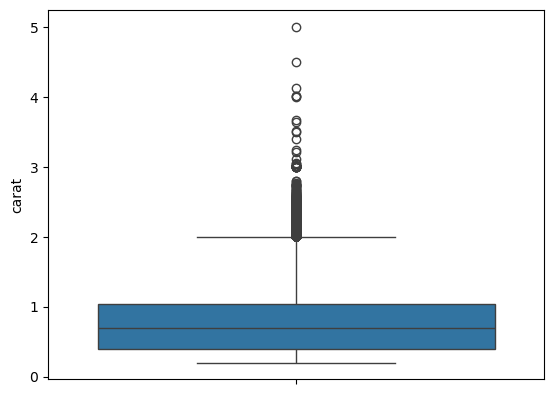

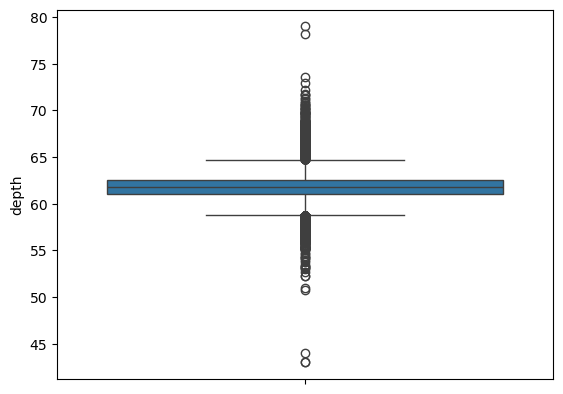

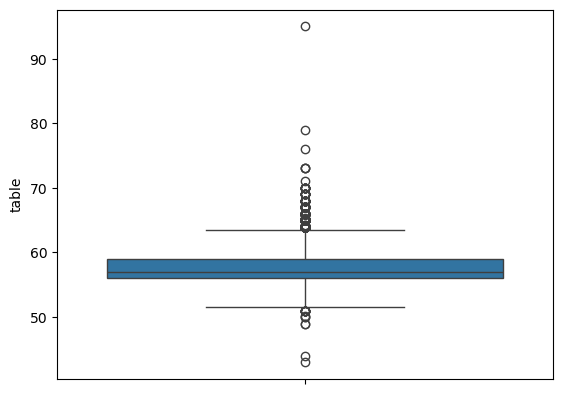

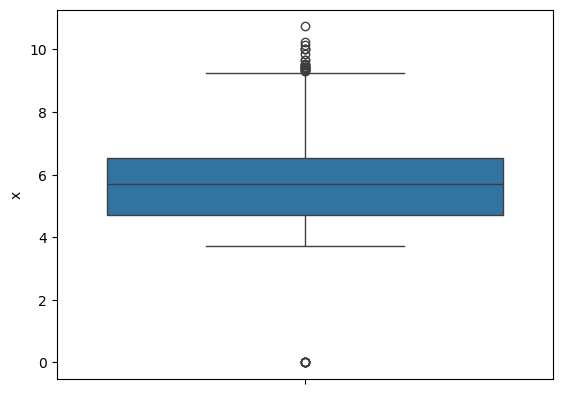

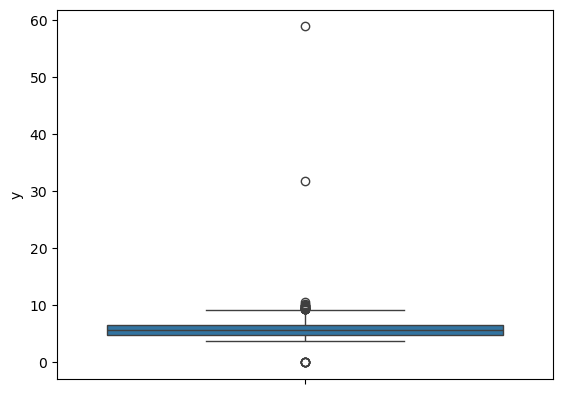

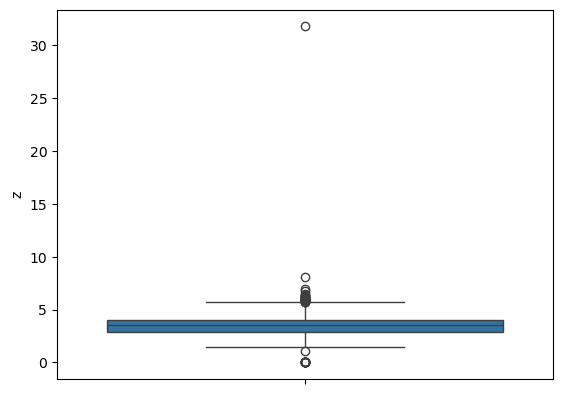

In [23]:
for col in num_cols:
    sns.boxplot(data = X[col])
    plt.show()

# Handling Outliers

In [24]:
from feature_engine.outliers import Winsorizer

In [25]:
for i in num_cols:
    winsor = Winsorizer(capping_method ='iqr', tail = 'both', fold = 1.5)
    X[i] = winsor.fit_transform(X[[i]])

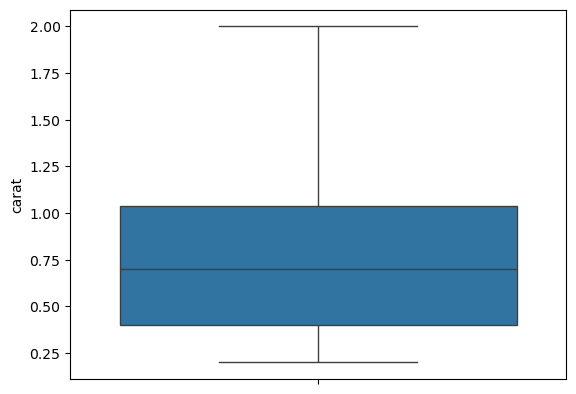

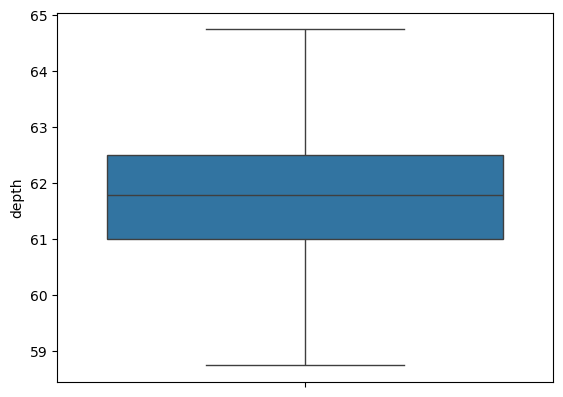

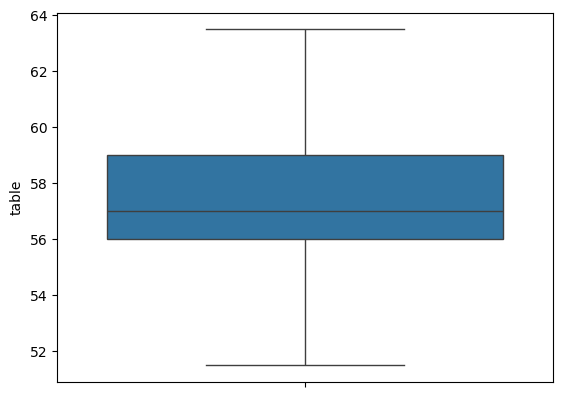

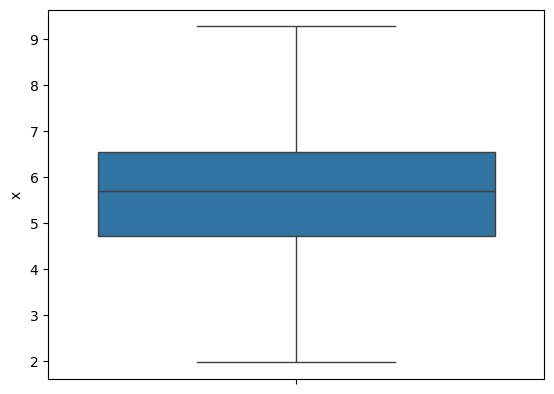

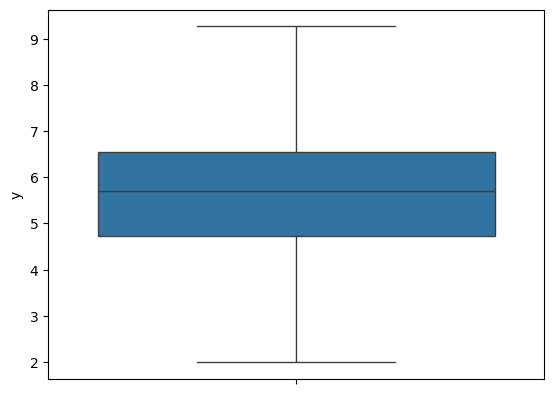

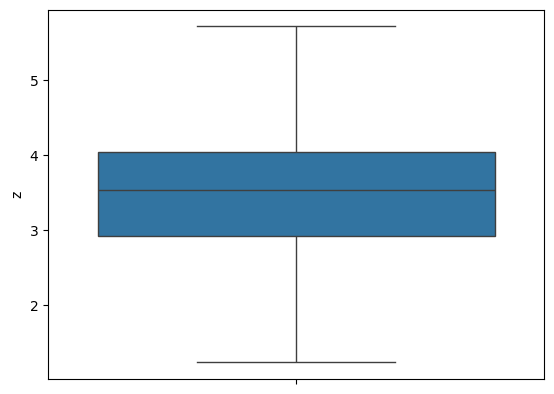

In [26]:
for col in num_cols:
    sns.boxplot(data = X[col])
    plt.show()

In [27]:
# splitting data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [29]:
print(x_train.shape)
print(x_test.shape)

(40345, 9)
(13449, 9)


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   x        53794 non-null  float64
 7   y        53794 non-null  float64
 8   z        53794 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


In [31]:
from sklearn. compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [34]:
tns = ColumnTransformer(transformers = [("t1",OrdinalEncoder(),[1,2,3]),
                                       ("t2",StandardScaler(),[0,4,5,6,7,8])])

In [35]:
# Let us apply fit_transform on Train Data
X_train_trans = tns.fit_transform(x_train)

# Let us apply transform on Test Data
X_train_trans = pd.DataFrame(X_train_trans)

In [36]:
X_test_trans = tns.transform(x_test)
X_test_trans = pd.DataFrame(X_test_trans)

In [51]:
# Model Building

from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors = 7,weights = "distance",algorithm = "auto",leaf_size = 35)

In [52]:
kn.fit(X_train_trans,y_train)

KNeighborsRegressor(leaf_size=35, n_neighbors=7, weights='distance')

In [53]:
y_pred = kn.predict(X_test_trans)
print(y_pred.shape)
print(y_test.shape)

(13449,)
(13449,)


In [54]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print("accuracy:",r2)

accuracy: 0.9684444878572684


# Train accuracy

In [55]:
y_train_pred = kn.predict(X_train_trans)

from sklearn.metrics import r2_score

In [56]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train_pred,y_train)
print("accuracy:",r2)

accuracy: 0.9999977271617022


In [57]:
import pickle

In [58]:
with open("diamond_model.pkl","wb") as file:
    pickle.dump(kn,file)

In [62]:
with open("diamond_model.pkl","rb") as file:
    loaded_model = pickle.load(file)
print("model saved successfully as model.pkl")

model saved successfully as model.pkl
